# Stock Market Prediction using Numerical and Textual Analysis
Author: Prateek Sengar


Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pylab

from textblob import TextBlob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Loading data

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

#Headlines data
file_path = 'gdrive/My Drive/Colab Notebooks/data/india-news-headlines.csv'
headlines_data = pd.read_csv(file_path)


#TCS stock data
file_path = 'gdrive/My Drive/Colab Notebooks/data/TCS.csv'
stock_data = pd.read_csv(file_path)




Mounted at /content/gdrive


In [3]:
headlines_data.head(5)



,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [4]:
stock_data.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [5]:
print("Missing values: ")
print("Is there any missing values in the headlines dataset? ",headlines_data.isnull().values.any())
print("Is there any missing values in the stock dataset? ", stock_data.isnull().values.any())

Missing values: 
Is there any missing values in the headlines dataset?  False
Is there any missing values in the stock dataset?  True


In [6]:
# Keeping only the required columns
stock_data = stock_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Trades']]

In [7]:
stock_data

,Date,Open,High,Low,Close,Volume,Trades
0,2004-08-25,1198.7,1198.70,979.00,987.95,17116372,NaN
1,2004-08-26,992.0,997.00,975.30,979.00,5055400,NaN
2,2004-08-27,982.4,982.40,958.55,962.65,3830750,NaN
3,2004-08-30,969.9,990.00,965.00,986.75,3058151,NaN
4,2004-08-31,986.5,990.00,976.00,988.10,2649332,NaN
...,...,...,...,...,...,...,...
4032,2020-11-23,2690.0,2730.00,2665.00,2724.25,3706418,150378.0
4033,2020-11-24,2734.4,2743.00,2705.00,2722.05,3120516,148092.0
4034,2020-11-25,2729.0,2732.95,2688.20,2701.30,3302249,163422.0
4035,2020-11-26,2686.0,2730.95,2680.00,2720.60,2341099,103635.0


# Preprocessing


Dealing with missing values in the stock dataset (Preprocessing)

In [8]:
# Checking columns with missing data
print(stock_data.isna().sum())
print("Number of missing values in stock dataset = ", stock_data.isnull().values.sum())

# Filling the Trades column's missing values with the mean value
stock_data['Trades'].fillna((stock_data["Trades"].mean()), inplace = True)



Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Trades    1683
dtype: int64
Number of missing values in stock dataset =  1683


In [9]:
# Checking again for columns with missing data
print(stock_data.isna().sum())
print("Number of missing values in stock dataset = ", stock_data.isnull().values.sum())


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Trades    0
dtype: int64
Number of missing values in stock dataset =  0


# Plotting the graph for visual representation of how the stock performed over the years

Text(0.5, 1.0, 'TCS Stock Price 2004 - 2020')

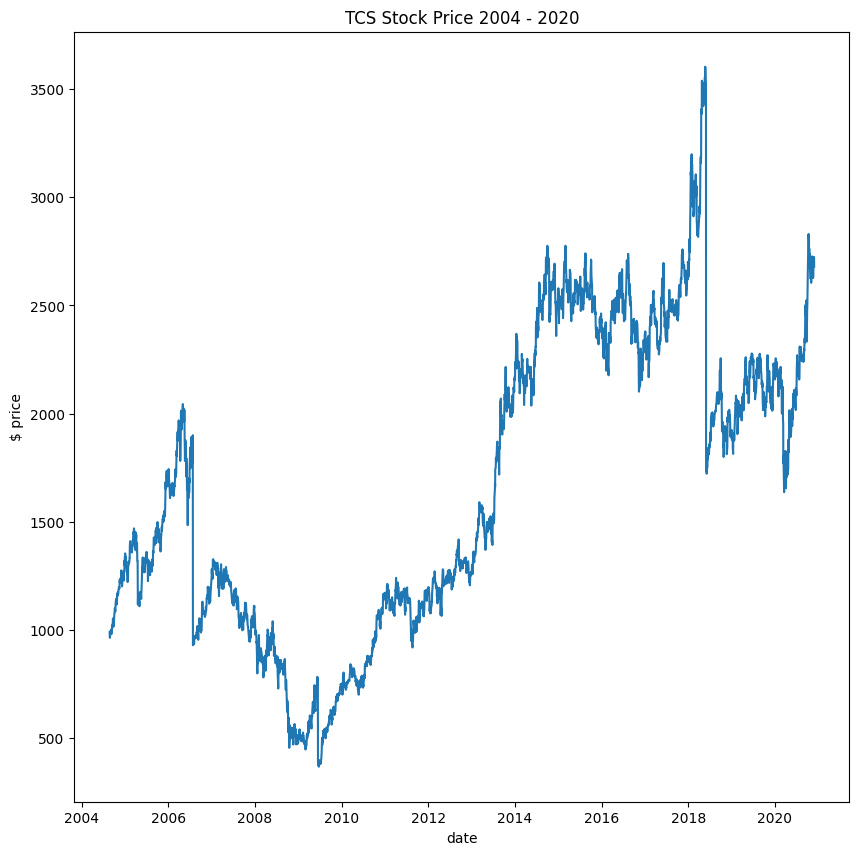

In [10]:
plt.figure(figsize=(10,10))
stock_data.index = pd.to_datetime(stock_data['Date'], format='%Y-%m-%d')
plt.plot(stock_data.index, stock_data['Close'])
plt.xlabel("date")
plt.ylabel("$ price")
plt.title("TCS Stock Price 2004 - 2020")

# Sentiment Analysis

Calculating polarity scores according to the dates

In [11]:
def polarity_scores(text):
  blob = TextBlob(text)
  return blob.sentiment.polarity

In [12]:
dates = headlines_data.publish_date.unique()

dates_stock_data = stock_data.Date
#print(dates_stock_data)
polarity_scores_lst = []
dates_lst = []

for date in dates:
  date_for_lst = str(date)[:4]+"-"+str(date)[4:6]+"-"+str(date)[6:8]
  if date_for_lst in dates_stock_data:
    dates_lst.append(date_for_lst)
    df = pd.DataFrame(headlines_data.loc[headlines_data['publish_date'] == date, 'headline_text'])
    headlines = ""
    for index, row in df.iterrows():
      headlines+=row['headline_text']+", "
    score = polarity_scores(headlines)
    polarity_scores_lst.append(score)

In [13]:
new_dataset = pd.DataFrame()
new_dataset['Date'] = dates_lst
new_dataset['Polarity_score'] = polarity_scores_lst
new_dataset


,Date,Polarity_score
0,2004-08-25,0.041413
1,2004-08-26,0.055488
2,2004-08-27,0.073013
3,2004-08-30,0.093129
4,2004-08-31,0.078962
...,...,...
3925,2020-06-24,0.088329
3926,2020-06-25,0.027038
3927,2020-06-26,0.068333
3928,2020-06-29,0.061956


In [14]:
stock_data.index.name = None
stock_data = stock_data.rename_axis(None)

Final Dataset

In [15]:
df = pd.merge(new_dataset, stock_data, on='Date', how='left')
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Polarity_score,Open,High,Low,Close,Volume,Trades
0,2004-08-25,0.041413,1198.7,1198.70,979.00,987.95,17116372,82412.390399
1,2004-08-26,0.055488,992.0,997.00,975.30,979.00,5055400,82412.390399
2,2004-08-27,0.073013,982.4,982.40,958.55,962.65,3830750,82412.390399
3,2004-08-30,0.093129,969.9,990.00,965.00,986.75,3058151,82412.390399
4,2004-08-31,0.078962,986.5,990.00,976.00,988.10,2649332,82412.390399
...,...,...,...,...,...,...,...,...
3925,2020-06-24,0.088329,2034.0,2064.25,2031.60,2042.20,2560951,125500.000000
3926,2020-06-25,0.027038,2035.0,2060.00,2009.25,2016.10,3044089,127554.000000
3927,2020-06-26,0.068333,2025.0,2132.00,2019.95,2118.85,6300912,237429.000000
3928,2020-06-29,0.061956,2108.0,2127.60,2091.30,2101.65,3076344,109993.000000


# Prediction

Creating Prediction models

In [16]:
#Split the data into independent 'X' and dependent 'Y' variables
df_new = df.drop('Date', axis=1)

X = df_new.loc[:, df_new.columns != 'Close'].values
Y = df_new.iloc[:, 4].values


Note: We will consider the close price of the stock as our target variable as the profit and loss calculations are determined by the close price.

In [17]:
# Split the dataset into 75% Training set and 25% Testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [18]:
#Sclaing (used to normalize the range of independent variables) data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [19]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):

  #Using SGDRegressor for Training
  sgd = SGDRegressor()
  sgd.fit(X_train, Y_train)

  #Using RandomForestRegressor Training
  rfr = RandomForestRegressor()
  rfr.fit(X_train, Y_train)

  return sgd, rfr

model = models(X_train,Y_train)

In [20]:
#Prediction using SGDRegressor
Y_pred = model[0].predict(X_test)
print("Accuracy of SGDRegressor:",model[0].score(X_test, Y_test))

Accuracy of SGDRegressor: 0.9994218264741916


In [21]:
#Prediction using RandomForestRegressor
Y_pred = model[1].predict(X_test)
print("Accuracy of RandomForestRegressor:",model[1].score(X_test, Y_test))

Accuracy of RandomForestRegressor: 0.9995870740175702


In [22]:
print("First 20 predictions on the test data: ")
print(Y_pred[:20])

First 20 predictions on the test data: 
[1055.0535  480.2605 1176.65   1219.6155 1824.777  2582.811   856.5785
 2546.788  1979.3445 1232.6665 2346.157  2506.8775  472.5195 2577.571
 1305.467  1258.2725 2597.72    963.6515 2249.783  2216.925 ]


In [23]:
pdf = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
pdf = pdf
print(pdf)

      Actual  Predicted
0    1048.20  1055.0535
1     480.75   480.2605
2    1175.90  1176.6500
3    1223.05  1219.6155
4    1819.80  1824.7770
..       ...        ...
978  2532.15  2499.8840
979  1286.80  1289.3885
980   964.80   954.3690
981  1220.80  1213.0680
982   931.35   936.3930

[983 rows x 2 columns]


[]

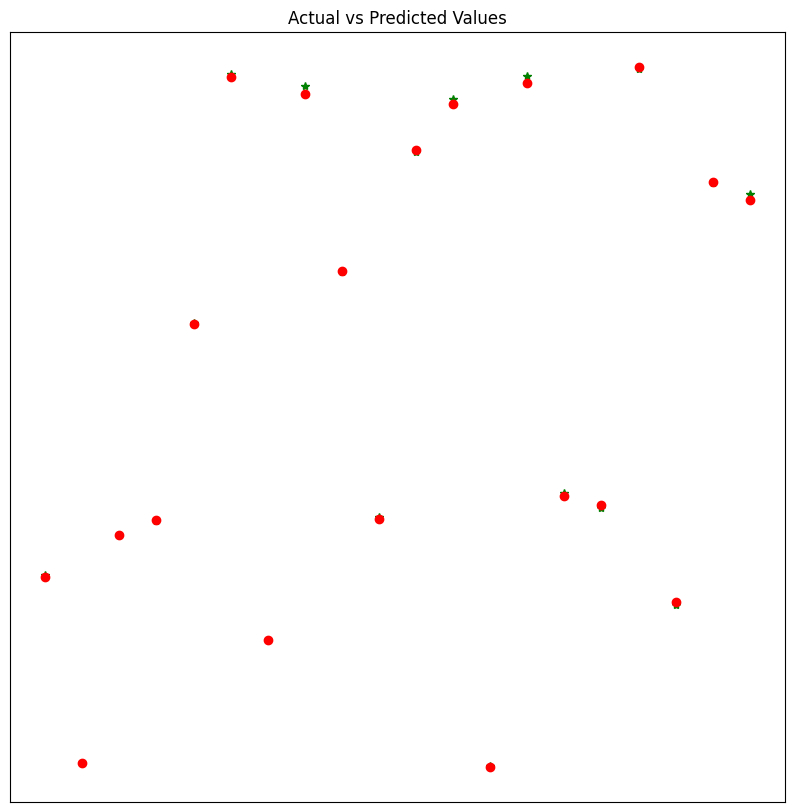

In [24]:
Y_pred = model[1].predict(X_test)
fig = plt.figure(figsize=(10,10))
plt.title('Actual vs Predicted Values')
plt.plot(Y_pred[:20],'g*', Y_test[:20], 'ro')

frame = pylab.gca()
frame.axes.get_xaxis().set_ticks([])
frame.axes.get_yaxis().set_ticks([])
